In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
from plot import experiment

# Positional

In [18]:
type_pred = 'p'
target = ['LIS', 'LIS_small', 'LIS_treap', 'Both']

## Bad Setting

In [37]:
setting = 'bad'

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



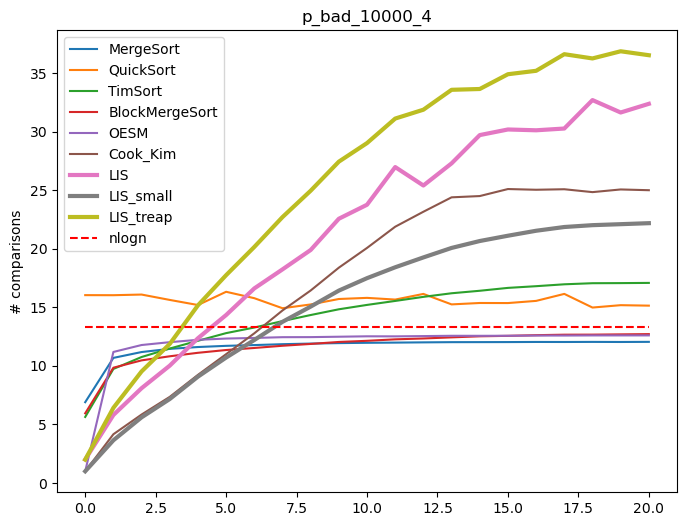

In [29]:
# 1.25
experiment(type_pred, setting, 10000, 4, exclude = [], target = target)

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



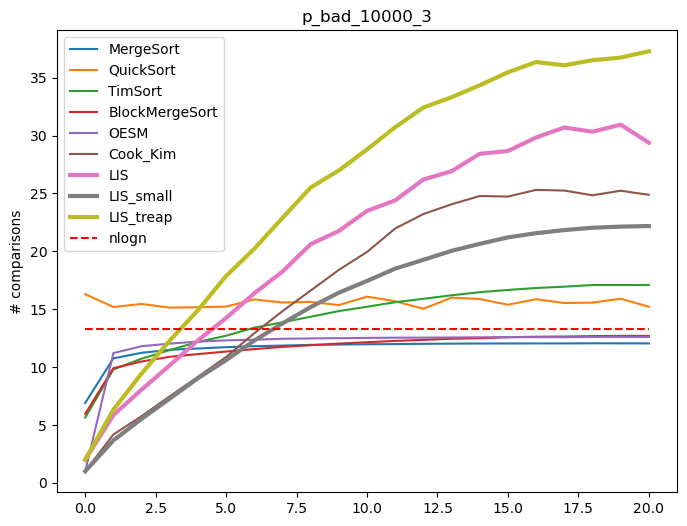

In [30]:
# 1.1
experiment(type_pred, setting, 10000, 3, exclude = [], target = target) 

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



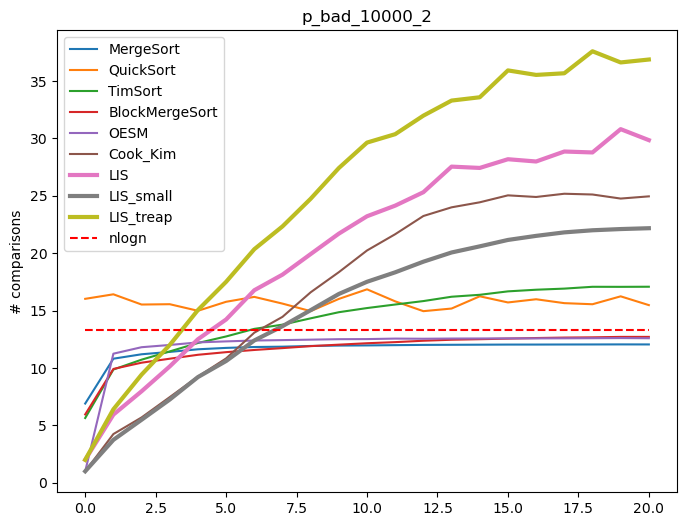

In [39]:
#1.0001
experiment(type_pred, setting, 10000, 2, exclude = [], target = target) 

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



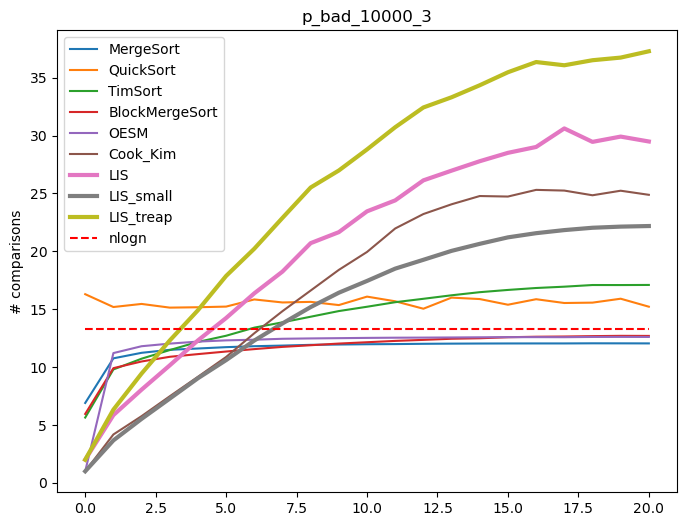

In [38]:
#1.05
experiment(type_pred, setting, 10000, 3, exclude = [], target = target) 

## Local Setting

In [32]:
setting = 'local'

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



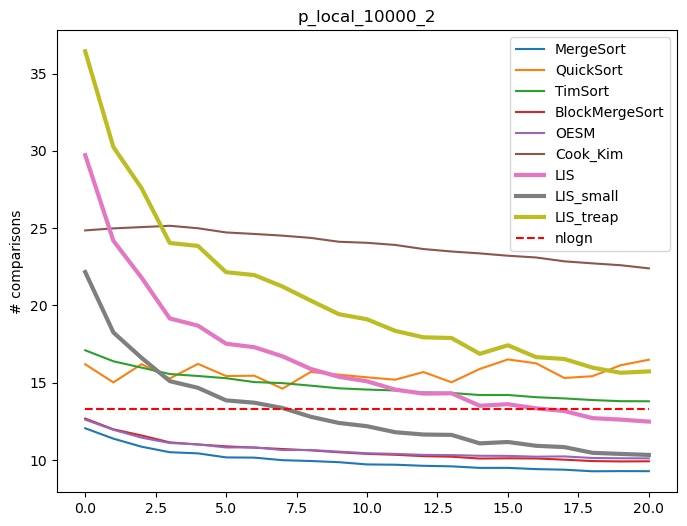

In [33]:
experiment(type_pred, setting, 10000, 2, exclude = [], target = target) 

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



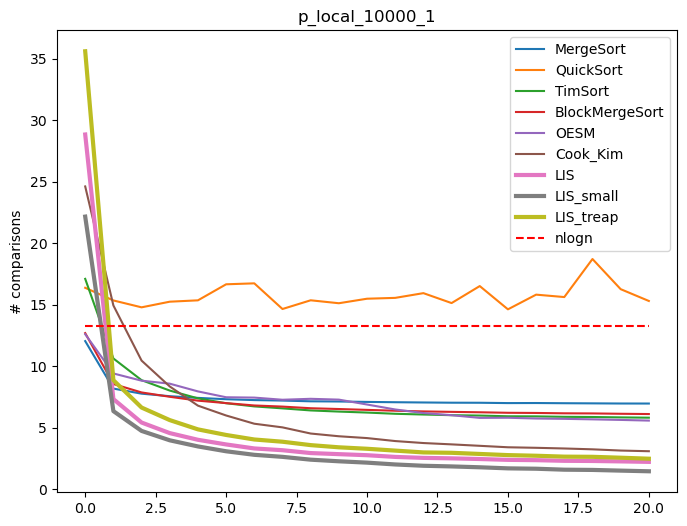

In [35]:
experiment(type_pred, setting, 10000, 1, exclude = [], target = target) 

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap             



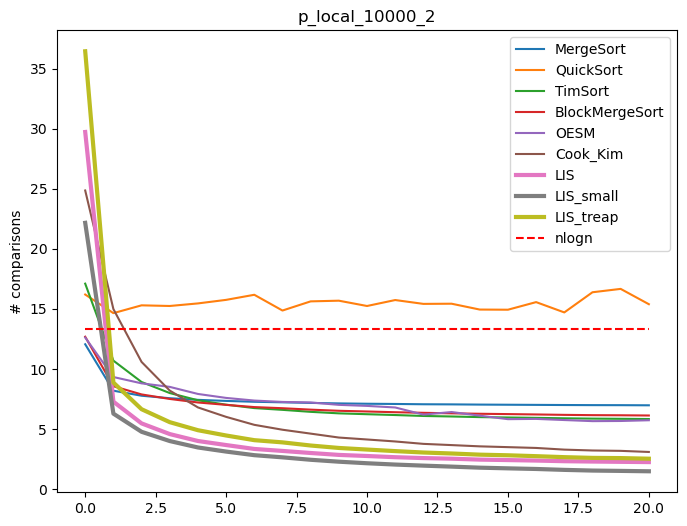

In [36]:
experiment(type_pred, setting, 10000, 2, exclude = [], target = target) 

# Relaitonal

In [43]:
target = ["DirtyClean2"]
exclude = ["LIS_small"]

## Goodbad

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap BothAlgo_small DirtyClean2           



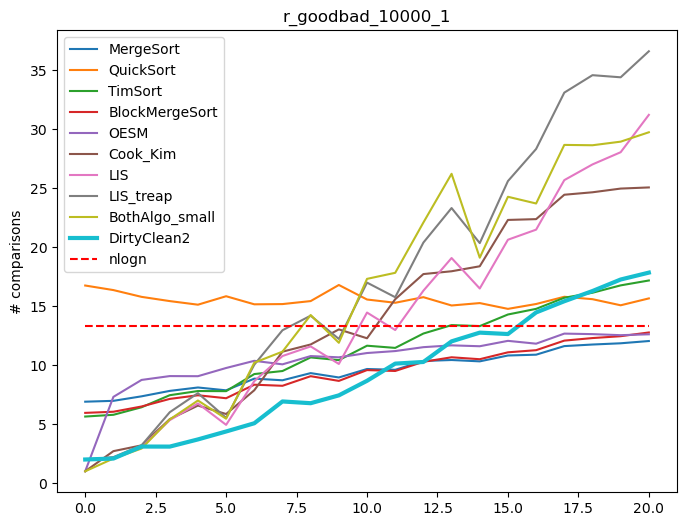

In [45]:
experiment("r", 'goodbad', 10000, 1, exclude = exclude, target = target) 

MergeSort QuickSort TimSort BlockMergeSort OESM Cook_Kim LIS LIS_small LIS_treap BothAlgo_small DirtyClean2           



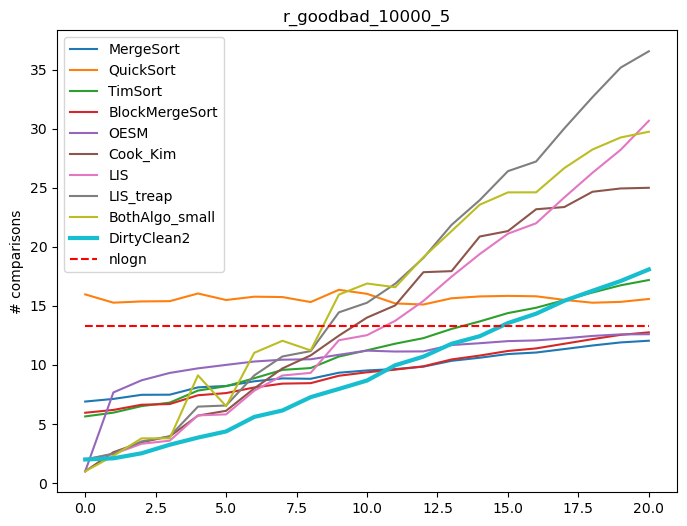

In [49]:
experiment("r", 'goodbad', 10000, 5, exclude = exclude, target = target) 